In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

2025-10-02 11:25:38.889969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-02 11:25:39.065826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-02 11:25:47.667662: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

/home/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-02 11:25:54.509551: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.6049 - loss: 1.4415
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 256ms/step - accuracy: 0.7809 - loss: 0.6159
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.8206 - loss: 0.5061
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 303ms/step - accuracy: 0.8399 - loss: 0.4489
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.8512 - loss: 0.4164
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.8599 - loss: 0.3854
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.8695 - loss: 0.3616
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.8734 - loss: 0.3489
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.8827 - loss: 0.3269
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - accuracy: 0.8845 - loss: 0.3190


Zur Untersuchung der Ausgabe der CNN-Layers wird ein neues Sequential-Modell 'model2' mit CNN-Layer erstellt, dem die gelernten Gewichte von 'model' übergeben werden

In [4]:
model2 = Sequential()

conv_layer = Conv2D(10,
        kernel_size=(3, 3),
        activation="sigmoid",
        input_shape=(28, 28, 1))
     
model2.add(conv_layer)
conv_layer.set_weights(model.layers[0].get_weights())

Exemplarischer Vergleich der Testdaten mit der Predict-Ausgabe des CNN-Layers

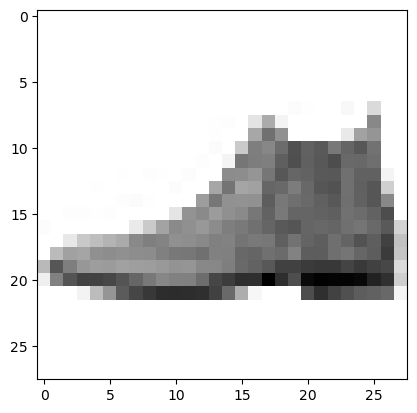

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_test[0], cmap="gray_r")
plt.show()

In [7]:
result = model2.predict(X_test[0].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [8]:
result.shape

(1, 26, 26, 10)

In [9]:
result[0].shape

(26, 26, 10)

In [10]:
result[0][:, :, 0]

array([[4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01],
       [4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01, 4.22678560e-01, 4.22678560e-01,
        4.22678560e-01, 4.22678560e-01],
       [4.22678560e-01, 4.22678560e-01, 4.22678560e-01

Ausgabe von dem, was das NN nach dem CNN-Layer berechnet

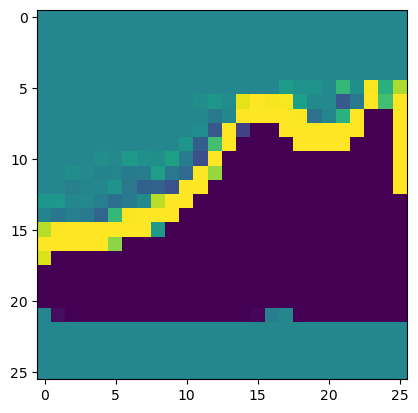

In [11]:
plt.imshow(result[0][:, :, 6])
plt.show()